## Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

## Data Preprocessing

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.shape

(768, 9)

In [6]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.0,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.0,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.0,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.0,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.0,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DiabetesPedigreeFunction,768.0,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.0,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00


In [7]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

#### Checking for Duplicates

In [8]:
print("Shape before dropping the Duplicates:", df.shape)
df = df.drop_duplicates()
print("Shape after dropping the Duplicates:", df.shape)

Shape before dropping the Duplicates: (768, 9)
Shape after dropping the Duplicates: (768, 9)


####     There are no Duplicates


#### Checking for missing values

In [9]:
print("Number of missing values in Glucose: ", df[df['Glucose'] == 0].shape[0])
print("Number of missing values in Insulin: ", df[df['Insulin'] == 0].shape[0])
print("Number of missing values in Blood Pressure: ", df[df['BloodPressure'] == 0].shape[0])
print("Number of missing values in Skin Thickness: ", df[df['SkinThickness'] == 0].shape[0])
print("Number of missing values in BMI: ", df[df['BMI'] == 0].shape[0])
print("Number of missing values in Diabetes Pedigree Function: ", df[df['DiabetesPedigreeFunction'] == 0].shape[0])

Number of missing values in Glucose:  5
Number of missing values in Insulin:  374
Number of missing values in Blood Pressure:  35
Number of missing values in Skin Thickness:  227
Number of missing values in BMI:  11
Number of missing values in Diabetes Pedigree Function:  0


In [10]:
print("The mean of Glucose:", df['Glucose'].mean())
print("The mean of Insulin:", df['Insulin'].mean())
print("The mean of Blood Pressure:", df['BloodPressure'].mean())
print("The mean of Skin Thickness:", df['SkinThickness'].mean())
print("The mean of BMI:", df['BMI'].mean())

The mean of Glucose: 120.89453125
The mean of Insulin: 79.79947916666667
The mean of Blood Pressure: 69.10546875
The mean of Skin Thickness: 20.536458333333332
The mean of BMI: 31.992578124999998


#### Replacing the missing values with their means

In [11]:
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())

#### Rechecking the Missing values

In [12]:
print("Number of missing values in Glucose: ", df[df['Glucose'] == 0].shape[0])
print("Number of missing values in Insulin: ", df[df['Insulin'] == 0].shape[0])
print("Number of missing values in Blood Pressure: ", df[df['BloodPressure'] == 0].shape[0])
print("Number of missing values in Skin Thickness: ", df[df['SkinThickness'] == 0].shape[0])
print("Number of missing values in BMI: ", df[df['BMI'] == 0].shape[0])

Number of missing values in Glucose:  0
Number of missing values in Insulin:  0
Number of missing values in Blood Pressure:  0
Number of missing values in Skin Thickness:  0
Number of missing values in BMI:  0


### Data Visualization

##### Before Data Normalization

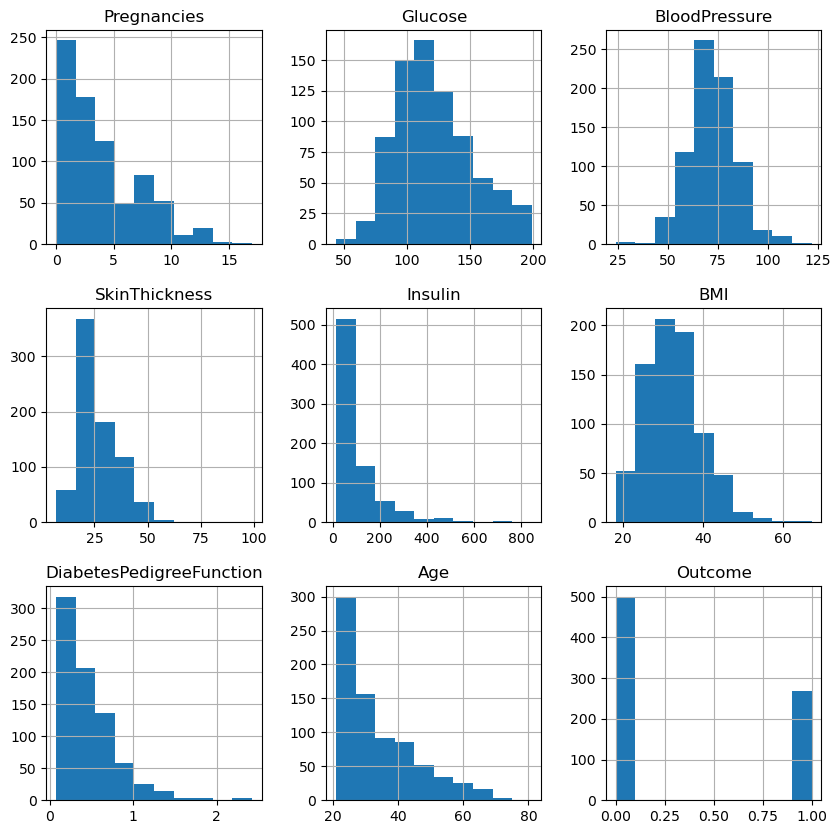

In [13]:
df.hist(bins=10,figsize=(10,10))
plt.show()

In [14]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [15]:
standardised_data = scaler.transform(df)
print(standardised_data)

[[ 0.63994726  0.86527574 -0.0210444  ...  0.46849198  1.4259954
   1.36589591]
 [-0.84488505 -1.20598931 -0.51658286 ... -0.36506078 -0.19067191
  -0.73212021]
 [ 1.23388019  2.01597855 -0.68176235 ...  0.60439732 -0.10558415
   1.36589591]
 ...
 [ 0.3429808  -0.02240928 -0.0210444  ... -0.68519336 -0.27575966
  -0.73212021]
 [-0.84488505  0.14197684 -1.01212132 ... -0.37110101  1.17073215
   1.36589591]
 [-0.84488505 -0.94297153 -0.18622389 ... -0.47378505 -0.87137393
  -0.73212021]]


In [16]:
scaled_df = pd.DataFrame(standardised_data,columns = df.columns)
scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865276,-0.021044,0.872057,-0.417768,0.167255,0.468492,1.425995,1.365896
1,-0.844885,-1.205989,-0.516583,0.248678,-0.417768,-0.851535,-0.365061,-0.190672,-0.732120
2,1.233880,2.015979,-0.681762,-0.630654,-0.417768,-1.331821,0.604397,-0.105584,1.365896
3,-0.844885,-1.074480,-0.516583,-0.374700,-0.265107,-0.633222,-0.920763,-1.041549,-0.732120
4,-1.141852,0.503626,-2.663916,0.872057,0.530423,1.549899,5.484909,-0.020496,1.365896


##### After Data Normalization


<function matplotlib.pyplot.show(close=None, block=None)>

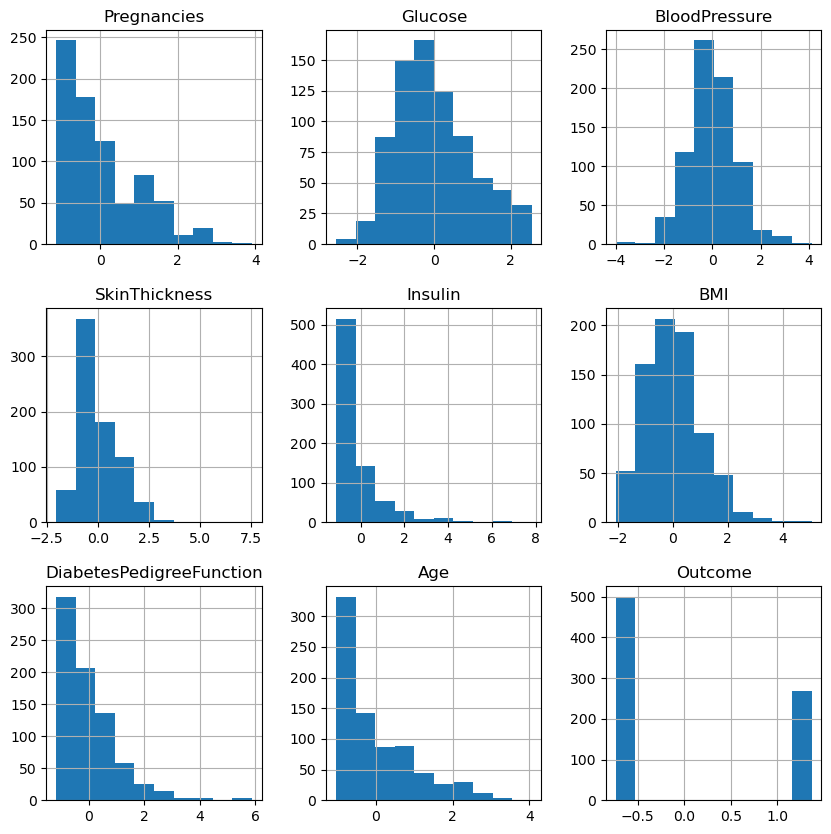

In [17]:
scaled_df.hist(bins = 10, figsize = (10,10))
plt.show


### Analysis Relationships between Variables 
#### Correlation Analysis

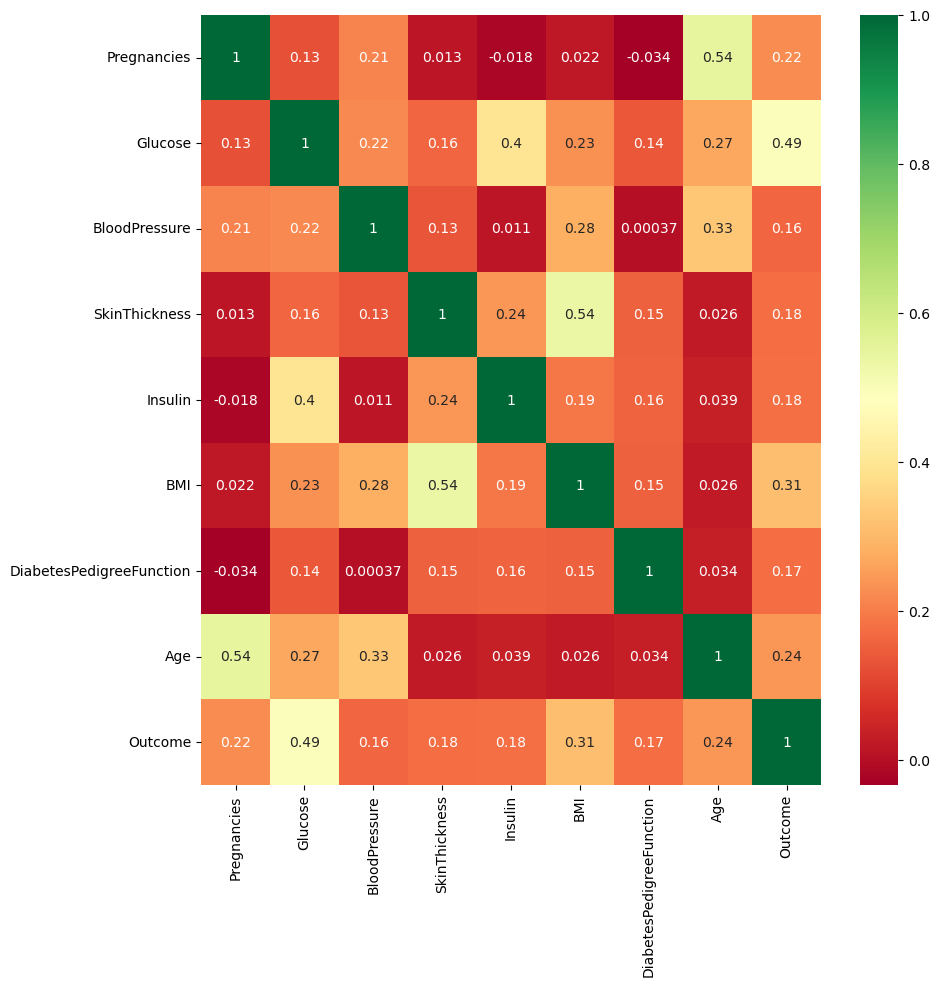

In [18]:
corr_mat = df.corr()
plt.figure(figsize=(10,10))

#plot heat map
g = sns.heatmap(corr_mat, annot=True, cmap='RdYlGn')

#### Splitting the DataSet into Training and Test Data

In [19]:
X = scaled_df.drop('Outcome', axis =1)
y = df['Outcome']
print(X)
print(y)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.865276      -0.021044       0.872057 -0.417768  0.167255   
1      -0.844885 -1.205989      -0.516583       0.248678 -0.417768 -0.851535   
2       1.233880  2.015979      -0.681762      -0.630654 -0.417768 -1.331821   
3      -0.844885 -1.074480      -0.516583      -0.374700 -0.265107 -0.633222   
4      -1.141852  0.503626      -2.663916       0.872057  0.530423  1.549899   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.679954       0.309315       2.222711  0.659428  0.065376   
764    -0.547919  0.010468      -0.186224       0.040885 -0.417768  0.632988   
765     0.342981 -0.022409      -0.021044      -0.374700 -0.071599 -0.909751   
766    -0.844885  0.141977      -1.012121      -0.630654 -0.417768 -0.342140   
767    -0.844885 -0.942972      -0.186224       0.456471 -0.417768 -0.298477   

     DiabetesPedigreeFunction       Age

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


## Classification Models

#### 1) Logistic Regression

In [21]:
lr_model = LogisticRegression(solver='liblinear', multi_class='ovr')
lr_model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

#### 2) K Neighbor Classifier

In [22]:
error_rate = []
for i in range(1,15):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(X_train,y_train)
    pred_i = knn_model.predict(X_test)
    error_i = np.mean(pred_i != y_test)
    error_rate.append(error_i)
error_rate[:5]  

[0.34415584415584416,
 0.2987012987012987,
 0.2792207792207792,
 0.2792207792207792,
 0.2532467532467532]

Text(0, 0.5, 'Error Rate')

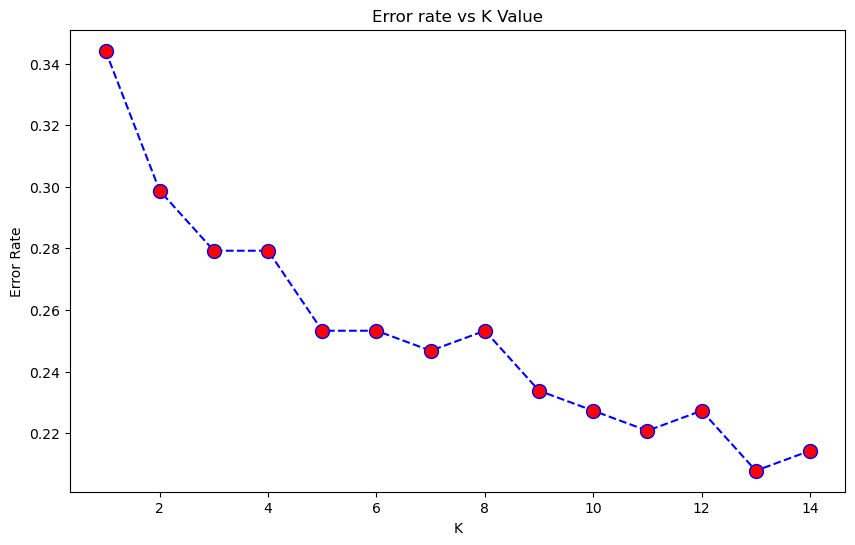

In [23]:
plt.figure(figsize = (10,6))
plt.plot(range(1,15),error_rate,color = 'blue', linestyle = 'dashed', marker = "o", markerfacecolor = "red", markersize = 10)
plt.title('Error rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [24]:
knn_model_eval = KNeighborsClassifier(n_neighbors = 13)

knn_model_eval.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13)

#### 3) Naive Bayes

In [25]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

#### 4) Support Vector Machine

In [26]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

#### 5) Random Forest

In [27]:
rf_model = RandomForestClassifier(criterion='entropy')
rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

#### 6) Decision Trees

In [28]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

### Prediction and Evaluation of the Model

In [29]:
lr_preds = lr_model.predict(X_test)

knn_preds = knn_model.predict(X_test)

nb_preds = nb_model.predict(X_test)

svm_preds = svm_model.predict(X_test)

dt_preds = dt_model.predict(X_test)

rf_preds = rf_model.predict(X_test)

In [30]:
print('Accuracy score of Logistic Regression:', 
      round(accuracy_score(y_test, lr_preds) * 100, 2))
print('Accuracy score of KNN:', 
      round(accuracy_score(y_test, knn_preds) * 100, 2))
print('Accuracy score of Naive Bayes:', 
      round(accuracy_score(y_test, nb_preds) * 100, 2))
print('Accuracy score of SVM:', 
      round(accuracy_score(y_test, svm_preds) * 100, 2))
print('Accuracy score of Decision Tree:', 
      round(accuracy_score(y_test, dt_preds) * 100, 2))
print('Accuracy score of Random Forest:', 
      round(accuracy_score(y_test, rf_preds) * 100, 2))

Accuracy score of Logistic Regression: 77.27
Accuracy score of KNN: 78.57
Accuracy score of Naive Bayes: 74.03
Accuracy score of SVM: 83.12
Accuracy score of Decision Tree: 79.22
Accuracy score of Random Forest: 81.82


### Saving the model with the highest accuracy 

In [31]:
# svm has the highest accuracy
pickle.dump(svm_model, open('svm_model.pkl', 'wb'))

In [32]:
y_pred = svm_model.predict(X_test)
y_pred[:5]

array([0, 1, 1, 0, 0], dtype=int64)

### Viewing the Confusion Matrix

[[91  6]
 [20 37]]


<Axes: >

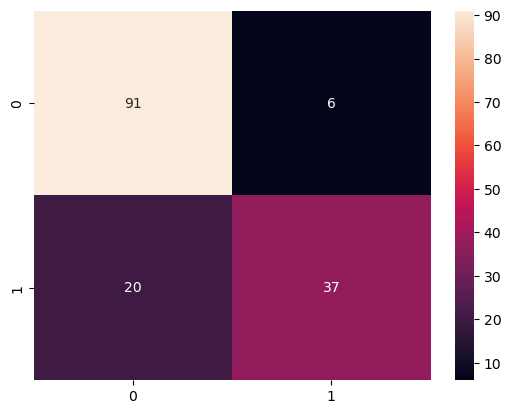

In [33]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm, annot =True)

[[91 20]
 [ 6 37]]


<Axes: >

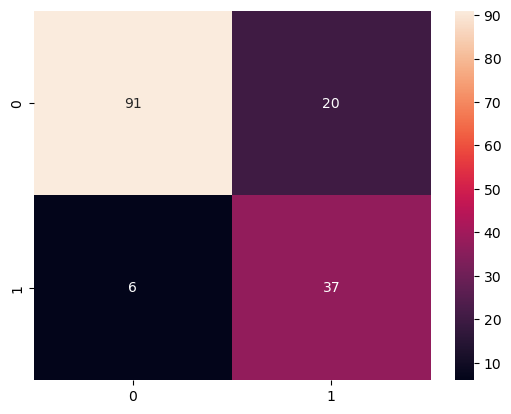

In [34]:
cm = confusion_matrix(y_pred,y_test)
print(cm)
sns.heatmap(cm, annot=True)
